# Load Libraries

In [3]:
import numpy as np
import cv2
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import random
import os
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the training data set

**conv** function is used for image Convolution. Convolution is a general purpose filter effect for images.It works by determining the value of a central pixel by adding the weighted values of all its neighbors together. values of the kernel act as weights. Values are clipped after applying the kernel since pixel values of an image should lie between 0 and 255.
 

In [4]:
def conv(img,kernel):
    img_conv= signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')
    img_conv=np.clip(img_conv, 0, 255)
    img_conv=np.array(img_conv,dtype='uint8')
    return(img_conv)

Two different blur kernels have been generated.The **Gaussian** blur filter is constructed based on the normal distribution, which is shaped like a bell curve. The idea is that pixels closer to the center pixel have a larger weight and those further a way a smaller weight. The standard deviation, in other words, the average distance from the mean, determines how wide or narrow the bell curve is. The larger the standard deviation, the wider the bell curve. A larger standard deviation usually also means a larger filter size is necessary, otherwise the change in values in the filter will be huge.

The average kernel works by moving through the image pixel by pixel, replacing each value with the average value of neighboring pixels, including itself.

In [5]:
#### Gaussian kernel####
def gau_K(w):
    # First a 1-D  Gaussian
    t = np.linspace(-(w//2), w//2, w)
    bump = np.exp(-0.5*t**2)/(2*np.pi*1)
    bump /= np.trapz(bump) # normalize the integral to 1
    # make a 2-D kernel out of it
    kernel_gaussian = bump[:, np.newaxis] * bump[np.newaxis, :]
    return(kernel_gaussian)
########################

###Averaging kernel###
def avg_K(w):
    kernel_avg=np.ones((w,w))
    kernel_avg=kernel_avg/(w*w)# normalize the integral to 1
    return(kernel_avg)
################

Three different noise models have been generated.

**Gaussian Noise (noisy_gauss)** follows Gaussian or Normal distribution.variance and mean of the gaussian distribution should be given as inputs.

To obtain an image with **salt and pepper noise (noisy_sp)** we need to add white and black pixels randomly in the image matrix. In another words ( in the sense of pixels), salt and pepper noise means that are high frequencies, so for salt noise the values of this noise type is high (255 ... 200), and for the pepper noise the values of this noise type is low (5 ... 0). 

**Poisson Noise (noisy_poisson)** follows the poisson distribution.Gaussian noise and salt and pepper noise are typically generated separately and independently from the original image and then added to it. hence, those noises are called additive noise. When applying Poisson noise, on the other hand, the original image is taken and asks the question “what would these individual pixels intensities be if they were produced by a Poisson process?”. This means that Poisson noise is correlated with the intensity of each pixel.

In [6]:
def noisy_gauss(image,mean,var):
        row,col,ch= image.shape
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy=np.clip(noisy, 0, 255)
        noisy=np.array(noisy,dtype='uint8')
        return noisy
def noisy_sp(s_vs_p,amount,image):
        row,col,ch = image.shape
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        for i in range(int(num_salt)):
            out[coords[0][i],coords[1][i],coords[2][i]]=255
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        for i in range(int(num_pepper)):
            out[coords[0][i],coords[1][i],coords[2][i]]=0
        return out
def noisy_poisson(image):
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        noisy=np.clip(noisy, 0, 255)
        noisy=np.array(noisy,dtype='uint8')
        return noisy

**degrade_img** function is used to degrade images using different combinations of blur kernels and noise models.

In [7]:
def degrade_img(img,w,blur_n,noise_n):    
    if blur_n==0:
        kernel=gau_K(w)
    else:
        kernel=avg_K(w)
    img_blur=conv(img,kernel)
    if noise_n==0:
        img_noise=noisy_gauss(img_blur,0,10)
    elif noise_n==1:
        img_noise=noisy_sp(0.5,0.05,img_blur)
    else:
        img_noise=noisy_poisson(img_blur)
    return (img_noise)

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
gdrive_path = '/content/gdrive/My Drive/img_processing/'

In [11]:
!ls "/content/gdrive/My Drive/img_processing/"

 BSDS300   img_processing.ipynb  'poor quality'


In [17]:
cd content/drive/My Drive/img_processing/

[Errno 2] No such file or directory: 'content/drive/My Drive/img_processing/'
/content


Text(0.5, 1.0, 'Degraded Image')

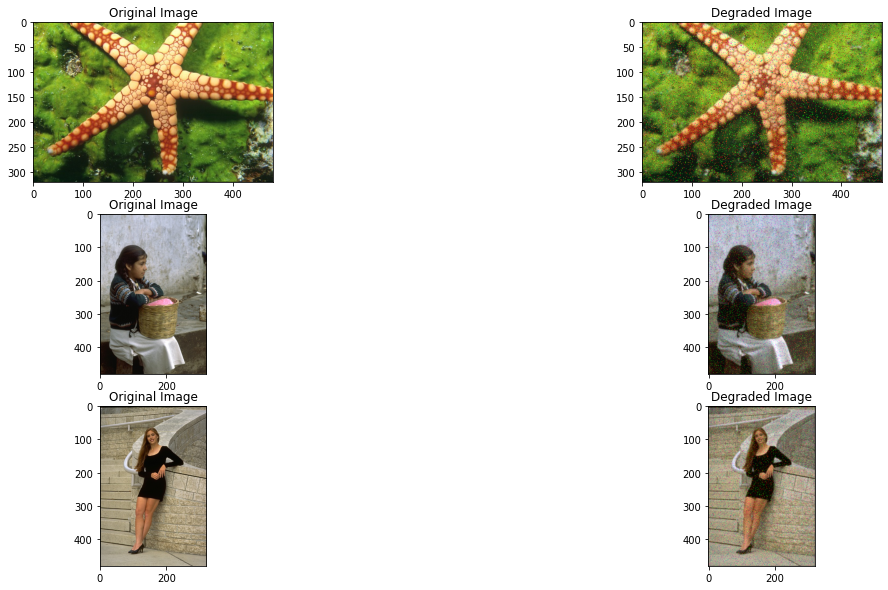

In [8]:
# path1='/content/gdrive/MyDrive/img_processing/BSDS300/images/train/12003.jpg'
# path2=''
# img1 = plt.imread('BSDS300/images/train/12003.jpg')
img1=plt.imread('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/12003.jpg')
img2 = plt.imread('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/23025.jpg')
img3 = plt.imread('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/388016.jpg')

# print("orginal image")
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.imshow(img1)
# plt.show()
plt.title('Original Image')
# print("degraded image")
plt.subplot(3,2,2)
plt.imshow(degrade_img(img1,17,0,1))
# plt.show()
plt.title('Degraded Image')

plt.subplot(3,2,3)
plt.imshow(img2)
# plt.show()
plt.title('Original Image')
# print("degraded image")
plt.subplot(3,2,4)
plt.imshow(degrade_img(img2,17,0,1))
# plt.show()
plt.title('Degraded Image')

plt.subplot(3,2,5)
plt.imshow(img3)
# plt.show()
plt.title('Original Image')
# print("degraded image")
plt.subplot(3,2,6)
plt.imshow(degrade_img(img3,17,0,1))
# plt.show()
plt.title('Degraded Image')


# print("orginal image")
# plt.imshow(img2)
# plt.show()
# print("degraded image")
# plt.imshow(degrade_img(img2,17,1,0))
# plt.show()

# print("orginal image")
# plt.imshow(img3)
# plt.show()
# print("degraded image")
# plt.imshow(degrade_img(img3,17,0,2))
# plt.show()

Few degraded images and their original images are given above. degradation looks realistic.

**save_patches** function is used to store degraded patches and their central pixel values. Data is stored as numpy arrays.

In [9]:
def save_patches(image_deg,image_org,img_n):
    h=image_org.shape[0]
    w=image_org.shape[1]
    central_pxls=[]
    patches=[]
    name=[]
    for i in range(int(W/2),h-int(W/2)):
        for j in range(int(W/2),w-int(W/2)):
            patches.append(image_deg[i-int(W/2):i+int(W/2)+1,j-int(W/2):j+int(W/2)+1,:])
            central_pxls.append(image_org[i,j,:])
    np.save('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/X/img'+str(img_n)+'.npy', np.array(patches))#save degraded patches
    np.save('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/Y/img'+str(img_n)+'.npy', np.array(central_pxls)) #save central pixels

In [11]:
img_path='/content/gdrive/MyDrive/img_processing/BSDS300/images/train/'
img_names=os.listdir(img_path) # load image names 
W=14 #large window size
###read images and save training data##
for i in range(len(img_names)):
    blur_n=random.randint(0, 1)
    noise_n=random.randint(0, 2)
    img = plt.imread(img_path+img_names[i])
    img_org=np.copy(img)
    img_deg=degrade_img(img,W,blur_n,noise_n)
    save_patches(img_deg,img_org,i+1)
##########################################

In [12]:
data_names=os.listdir('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/X') #load names of training data
W=14

Data should be preprocessed before feeding into machine learning models in order to get better accuracy. **pre_process** function is used to pre process data.

First image is converted in to HSI space.The HSI color space represents colors similarly to how the human eye senses colors.The HSI color model represents every color with three components: hue ( H ), saturation ( S ), intensity ( I ). Then, HIS image is normalized by dividing by 255.Finally, the normalized image is flattened into a 1D array.

In [13]:
def pre_process(img):
    img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #convert in to HSI space
    img_norm=img_hsv/255 #normalize
    img_arr=img_norm.flatten() #flatten
    return(img_arr)

**select_input** function is used to select 'w*w'  central pixels from 'W*W' image as inputs to the machine learning model. 

In [14]:
def select_input(img,w):
    if W!=w:
        return(pre_process(img[int((W-w)/2):-int((W-w)/2),int((W-w)/2):-int((W-w)/2),:]))
    else:
        return(pre_process(img))

In [15]:
###generate traing data set##########
X=[]
Y=[]
for ind_name in range(len(data_names)):
    print(ind_name)
    img_array=np.load('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/X/'+data_names[ind_name])#load saved data(X)
    cen_pxl_array=np.load('/content/gdrive/MyDrive/img_processing/BSDS300/images/train/Y/'+data_names[ind_name])#load saved data(Y)
    indxs=random.choices([i for i in range(img_array.shape[0])], k=110)
    for ind in indxs:
            X.append(select_input(img_array[ind],5)) #selct 5*5 central pixels as inputs
            Y.append(cen_pxl_array[ind])
#########################################

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [16]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X),np.array(Y), test_size=0.20, random_state=33) #split data 

In [17]:
X_train.shape

(17600, 147)

# Modeling

**Support Vector Regression (SVR)** is used as the machine learning model. When the support vector machine is used for classification, it is referred to as support vector classification, and when it is used for regression, it is referred to as support vector regression.

general SVR cannot be used to tackle this problem since three outputs needed to be predicted. Hence, Multiple-output Support Vector Regression (MSVR) is used. Also, Support Vector Machines don't have a scalable nature and they don't work that well with mid-size or large datasets. Therefore 110 degraded patches were randomly selected from each image as training data.

In [18]:
class MSVR():
    def __init__(self, kernel='rbf', degree=3, gamma=None, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1):
        super(MSVR, self).__init__()
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.tol = tol
        self.C = C
        self.epsilon = epsilon
        self.Beta = None
        self.NSV = None
        self.xTrain = None
        self.rmse=[]

    def fit(self, x, y):
        self.xTrain = x.copy()
        C = self.C
        epsi = self.epsilon
        tol = self.tol

        n_m = np.shape(x)[0]  # num of samples
        n_d = np.shape(x)[1]  # input data dimensionality
        n_k = np.shape(y)[1]  # output data dimensionality (output variables)
        H = pairwise_kernels(x, x, metric=self.kernel, filter_params=True,
                             degree=self.degree, gamma=self.gamma, coef0=self.coef0)

        self.Beta = np.zeros((n_m, n_k))
        E = y - np.dot(H, self.Beta)
        #RSE
        u = np.sqrt(np.sum(E**2, 1, keepdims=True))
        #RMSE
        RMSE = []
        RMSE_0 = np.sqrt(np.mean(u**2))
        RMSE.append(RMSE_0)

        #points for which prediction error is larger than epsilon
        i1 = np.where(u > epsi)[0]

        #set initial values of alphas a (n_m * 1)
        a = 2 * C * (u - epsi) / u

        #L (n_m * 1)
        L = np.zeros(u.shape)

        # we modify only entries for which  u > epsi. with the sq slack
        L[i1] = u[i1]**2 - 2 * epsi * u[i1] + epsi**2

        #Lp is the quantity to minimize (sq norm of parameters + slacks)
        Lp = []
        BetaH = np.dot(np.dot(self.Beta.T, H), self.Beta)
        Lp_0 = np.sum(np.diag(BetaH), 0) / 2 + C * np.sum(L)/2
        Lp.append(Lp_0)

        eta = 1
        k = 1
        hacer = 1
        val = 1

        while(hacer):
            Beta_a = self.Beta.copy()
            E_a = E.copy()
            u_a = u.copy()
            i1_a = i1.copy()

            M1 = H[i1][:, i1] + \
                np.diagflat(1/a[i1]) + 1e-10 * np.eye(len(a[i1]))

            #compute betas
            sal1 = np.dot(np.linalg.inv(M1), y[i1])

            eta = 1
            self.Beta = np.zeros(self.Beta.shape)
            self.Beta[i1] = sal1.copy()

            #error
            E = y - np.dot(H, self.Beta)
            #RSE
            u = np.sqrt(np.sum(E**2, 1)).reshape(n_m, 1)
            i1 = np.where(u >= epsi)[0]

            L = np.zeros(u.shape)
            L[i1] = u[i1]**2 - 2 * epsi * u[i1] + epsi**2

            #%recompute the loss function
            BetaH = np.dot(np.dot(self.Beta.T, H), self.Beta)
            Lp_k = np.sum(np.diag(BetaH), 0) / 2 + C * np.sum(L)/2
            Lp.append(Lp_k)

            #Loop where we keep alphas and modify betas
            while(Lp[k] > Lp[k-1]):
                eta = eta/10
                i1 = i1_a.copy()

                self.Beta = np.zeros(self.Beta.shape)
                #%the new betas are a combination of the current (sal1)
                #and of the previous iteration (Beta_a)
                self.Beta[i1] = eta*sal1 + (1-eta)*Beta_a[i1]

                E = y - np.dot(H, self.Beta)
                u = np.sqrt(np.sum(E**2, 1)).reshape(n_m, 1)

                i1 = np.where(u >= epsi)[0]

                L = np.zeros(u.shape)
                L[i1] = u[i1]**2 - 2 * epsi * u[i1] + epsi**2
                BetaH = np.dot(np.dot(self.Beta.T, H), self.Beta)
                Lp_k = np.sum(np.diag(BetaH), 0) / 2 + C * np.sum(L)/2
                Lp[k] = Lp_k

                #stopping criterion 1
                if(eta < 1e-16):
                    Lp[k] = Lp[k-1] - 1e-15
                    self.Beta = Beta_a.copy()

                    u = u_a.copy()
                    i1 = i1_a.copy()

                    hacer = 0

            #here we modify the alphas and keep betas
            a_a = a.copy()
            a = 2 * C * (u - epsi) / u

            RMSE_k = np.sqrt(np.mean(u**2))
            RMSE.append(RMSE_k)
            self.rmse.append(RMSE)
            if((Lp[k-1]-Lp[k])/Lp[k-1] < tol):
                hacer = 0

            k = k + 1

            #stopping criterion #algorithm does not converge. (val = -1)
            if(len(i1) == 0):
                hacer = 0
                self.Beta = np.zeros(self.Beta.shape)
                val = -1

        self.NSV = len(i1)
        
    def predict(self, x):
        H = pairwise_kernels(x, self.xTrain, metric=self.kernel, filter_params=True,
                             degree=self.degree, gamma=self.gamma, coef0=self.coef0)
        yPred = np.dot(H, self.Beta)
        return yPred

In [ ]:
msvr = MSVR(kernel = 'rbf', gamma = 0.2, epsilon=0.001)
# Train
msvr.fit(X_train, y_train)

In [ ]:
y_pred_val = msvr.predict(X_val)
y_pred_train=msvr.predict(X_train)
# Evaluate the regressor
mae_one_train = mean_absolute_error(y_train[:,0], y_pred_train[:,0])
mae_two_train = mean_absolute_error(y_train[:,1], y_pred_train[:,1])
mae_three_train = mean_absolute_error(y_train[:,2], y_pred_train[:,2])
print(f'MAE for first regressor(train): {mae_one_train} - second regressor(train): {mae_two_train}- threed regressor(train): {mae_three_train}')
mae_one_val = mean_absolute_error(y_val[:,0], y_pred_val[:,0])
mae_two_val = mean_absolute_error(y_val[:,1], y_pred_val[:,1])
mae_three_val = mean_absolute_error(y_val[:,2], y_pred_val[:,2])
print(f'MAE for first regressor(val): {mae_one_val} - second regressor(val): {mae_two_val}- threed regressor(val): {mae_three_val}')

train errors and validation errors are somewhat similar. Hence, the model hasn't been overfitted. Different window sizes were used to select the input array. When the window size is increased input vector size is also increased. Therefore model will take more time to converge. Also model tries to overfit. Therefore 5 was selected as the window size. window size for degrading images is 17.

**predict_img** function is used to predict image when giving the noisy image. First, a blank clean image is initialized. Then each pixel value is predicted using the trained model.

In [ ]:
def predict_img(img,w):    
    h=img.shape[0]
    wit=img.shape[1]
    img_out=np.zeros((h,wit,3),dtype='uint8')
    for i in range(int(w/2),h-int(w/2)):
            print("processing ",i*100/h,"%")
            for j in range(int(w/2),wit-int(w/2)):
                inp=pre_process(img[i-int(w/2):i+int(w/2)+1,j-int(w/2):j+int(w/2)+1,:]).flatten()
                out=msvr.predict([inp])
                img_out[i,j,0]=int(out[0][0])
                img_out[i,j,1]=int(out[0][1])
                img_out[i,j,2]=int(out[0][2])
    return(img_out)

In [ ]:
img1 = plt.imread('BSDS300/images/test/37073.jpg')
img1_deg=degrade_img(img1,17,0,1)
img1_pre=predict_img(img1_deg,5)
print("original image")
plt.imshow(img1)
plt.show()
print("degraded image")
plt.imshow(img1_deg)
plt.show()
print("predicted image")
plt.imshow(img1_pre)
plt.show()

In [ ]:
img2 = plt.imread('BSDS300/images/test/385039.jpg')
img2_deg=degrade_img(img2,17,0,0)
img2_pre=predict_img(img2_deg,5)
print("original image")
plt.imshow(img2)
plt.show()
print("degraded image")
plt.imshow(img2_deg)
plt.show()
print("predicted image")
plt.imshow(img2_pre)
plt.show()

In [ ]:
img_poor1 = plt.imread('poor quality/img1.jpg')
img_poor1_pre=predict_img(img_poor1,5)
print("original image")
plt.imshow(img_poor1)
plt.show()
print("predicted image")
plt.imshow(img_poor1_pre)
plt.show()

In [ ]:
img_poor2 = plt.imread('poor quality/img2.jpg')
img_poor2_pre=predict_img(img_poor2,5)
print("original image")
plt.imshow(img_poor2)
plt.show()
print("predicted image")
plt.imshow(img_poor2_pre)
plt.show()

Noise has been removed up to some level in predicted images when compared to noisy images. But, the brightness of pixels has been reduced when compared to original images. CNN's are mostly used for tasks related to images such as image classification and recognition because of its high accuracy.CNNs are really effective as the concept of dimensionality reduction suits the huge number of parameters in an image. Hence, a CNN model will give a better result than what we achieved for this problem as well.